In [4]:
from sklearn.datasets import load_iris, make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target == 2  # for virginica

In [3]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [5]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(
    X_new
)  # the first hypothetical measurement is of Iris Virginica and second is not

array([ True, False])

In [8]:
svm_clf.decision_function(X_new)
# These measure the signed distance between each instance and the decision boundary

array([ 0.66163816, -0.22035761])

In [2]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42),
)
polynomial_svm.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

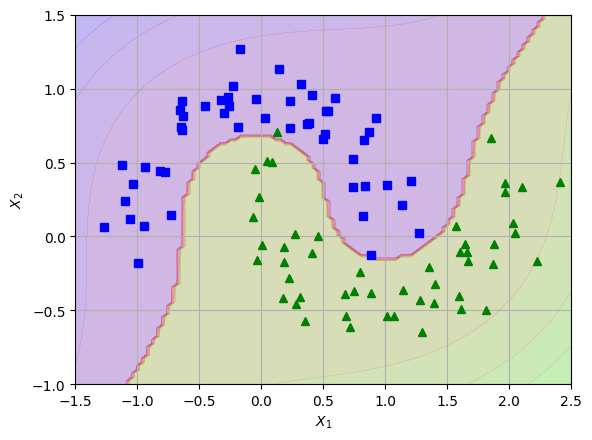

In [7]:
# plot
def plot_ds(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decison = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decison, cmap=plt.cm.brg, alpha=0.1)


plot_predictions(polynomial_svm, [-1.5, 2.5, -1, 1.5])
plot_ds(X, y, [-1.5, 2.5, -1, 1.5])